In [130]:
import torch.optim

train_data = "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Train_data"
test_data = "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Test_data"

In [131]:
import os
from PIL import Image

dir_train =  "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Train_data/benign"

for x in os.listdir(dir_train):
    img = Image.open(f"{dir_train}/{x}")
    print(img.size)

(685, 567)
(560, 465)
(770, 580)
(656, 458)
(779, 583)
(810, 695)
(563, 463)
(772, 581)
(768, 578)
(882, 581)
(558, 468)
(469, 394)
(555, 471)
(767, 583)
(554, 473)
(566, 466)
(775, 587)
(467, 392)
(552, 490)
(549, 463)
(555, 470)
(562, 471)
(467, 387)
(730, 574)
(550, 484)
(557, 471)
(646, 386)
(680, 583)
(558, 462)
(773, 578)
(567, 463)
(626, 583)
(469, 386)
(526, 474)
(555, 457)
(566, 469)
(319, 473)
(562, 470)
(582, 431)
(609, 396)
(551, 488)
(795, 558)
(703, 531)
(466, 391)
(556, 469)
(557, 473)
(768, 581)
(756, 578)
(555, 471)
(619, 589)
(560, 470)
(552, 468)
(549, 465)
(369, 342)
(780, 380)
(552, 483)
(769, 487)
(558, 464)
(726, 573)
(1028, 565)
(558, 471)
(582, 431)
(645, 614)
(777, 569)
(463, 392)
(550, 474)
(848, 685)
(554, 471)
(557, 465)
(610, 394)
(558, 451)
(769, 582)
(544, 469)
(558, 473)
(557, 468)
(613, 583)
(498, 331)
(759, 598)
(557, 468)
(558, 463)
(603, 396)
(573, 428)
(741, 574)
(706, 526)
(561, 469)
(556, 473)
(466, 389)
(734, 470)
(806, 711)
(469, 395)
(555, 468

In [132]:
from module_nn import create_dataloaders, TinyVGG, train_step, train, test_step

In [133]:
from torchvision import transforms

In [134]:
transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomResizedCrop(64),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [135]:
train_loader, test_loader, class_names = create_dataloaders(train_data,test_data,transforms,10)

In [136]:
model_one = TinyVGG(input_shape=3,hidden_units=10,output_shape=3)

In [137]:
import torch
from torch import nn

In [138]:
loss_fn = nn.CrossEntropyLoss()

In [139]:
optimizer = torch.optim.Adam(model_one.parameters(),lr=0.01)

In [140]:
data = train(model_one,train_loader,test_loader,optimizer,loss_fn,10,"cpu")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9905 | train_acc: 0.5375 | test_loss: 0.8934 | test_acc: 0.6241
Epoch: 2 | train_loss: 1.0662 | train_acc: 0.5569 | test_loss: 1.0144 | test_acc: 0.6241
Epoch: 3 | train_loss: 0.9991 | train_acc: 0.5667 | test_loss: 0.9050 | test_acc: 0.6241
Epoch: 4 | train_loss: 0.9585 | train_acc: 0.5681 | test_loss: 0.8768 | test_acc: 0.6241
Epoch: 5 | train_loss: 0.9610 | train_acc: 0.5625 | test_loss: 0.8745 | test_acc: 0.6241
Epoch: 6 | train_loss: 0.9643 | train_acc: 0.5569 | test_loss: 0.8746 | test_acc: 0.6241
Epoch: 7 | train_loss: 0.9659 | train_acc: 0.5625 | test_loss: 0.8707 | test_acc: 0.6241
Epoch: 8 | train_loss: 0.9608 | train_acc: 0.5625 | test_loss: 0.8759 | test_acc: 0.6241
Epoch: 9 | train_loss: 0.9653 | train_acc: 0.5625 | test_loss: 0.8735 | test_acc: 0.6241
Epoch: 10 | train_loss: 0.9613 | train_acc: 0.5625 | test_loss: 0.8761 | test_acc: 0.6241


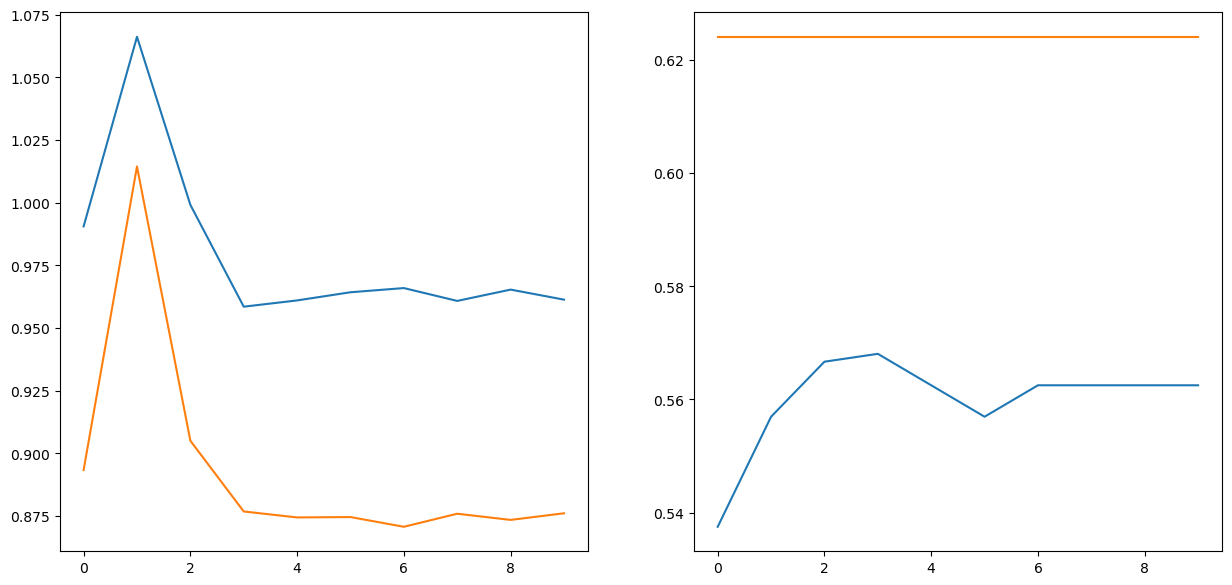

In [141]:
import matplotlib.pyplot as plt

epochs_train = range(len(data["train_loss"]))
epochs_test = range(len(data["test_loss"]))

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(epochs_train,data["train_loss"])
plt.plot(epochs_test,data["test_loss"])

plt.subplot(1,2,2)
plt.plot(epochs_train,data["train_acc"])
plt.plot(epochs_test,data["test_acc"])

In [147]:
import random
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

test_dir =[]

dir_test =  "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Test_data/benign"

test_dir = [os.path.join(dir_test, x) for x in os.listdir(dir_test)]

random_img_text = random.choice(test_dir)

from torchvision.io.image import read_image

img_tensor = read_image(random_img_text).float()

transform_image = transforms.Compose([transforms.Resize(size=(64,64))])

transformed_image =  transform_image(img_tensor).unsqueeze(0)

model_one.eval()
with torch.inference_mode():
    one_image = model_one(transformed_image)


one_image[0]

tensor([ 0.5906, -0.0659, -0.7602])

In [152]:
torch.softmax(one_image, dim = 1)

tensor([[0.5625, 0.2917, 0.1457]])

In [154]:
class_names

['benign', 'malignant', 'normal']